## <center>Convolutional Neural Networks for Image Classification</center>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Data exploration

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
single_image.shape

(28, 28)

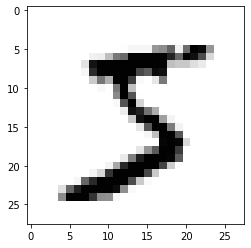

In [6]:
plt.imshow(single_image, cmap="Greys");

### PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [7]:
# Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Looks like the labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [14]:
y_cat_train = to_categorical(y_train) # Number of classes can specified or not, the to_categorical actually infers the categories

### Processing X Data

In [15]:
max_val = single_image.max()

In [16]:
x_train = x_train/max_val
x_test = x_test/max_val

In [17]:
scaled_single = x_train[0]

In [18]:
scaled_single.max()

1.0

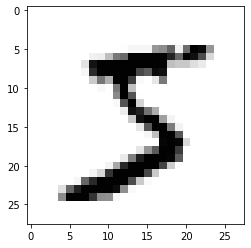

In [19]:
plt.imshow(scaled_single, cmap="Greys")

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)
#                       batch size, width, height, color channel
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

### Training the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

# When builiding a CNN, the steps are the following:

# 1. First thing that CNN encounters is a CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
# filters must be chosen, powers of 2 is a good approach
# kernel size, must be square matrix the bigger the more points will it take
# strides --> default (1,1) movment of the kernel, the bigger the less accurate
# pading, if size of image, divided by kernel size doesn't give an integer use same, else defaul value valid
# input_shape shape of one 1 image


# 2. Add a POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# defalut values: pool_size=(2, 2)

# 3. FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 4. 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# 5. LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # categorcial crossentropy outputs loss, however another metric is added --> accuracy

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop], verbose=1)

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1417 - accuracy: 0.9567 - val_loss: 0.0518 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0463 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0391 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0421 - val_accuracy: 0.9878


### Evaluate the Model

In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141675,0.956733,0.051789,0.9833
1,0.048167,0.985133,0.042986,0.9865
2,0.031173,0.990850,0.046275,0.9851
3,0.020449,0.993683,0.039143,0.9870
4,0.014657,0.995117,0.041621,0.9872


<AxesSubplot:>

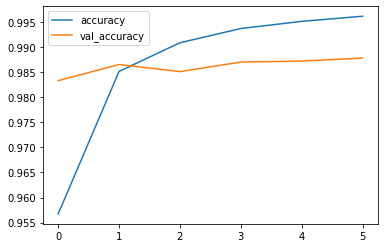

In [33]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

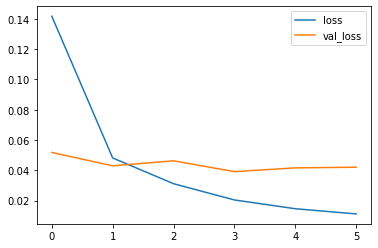

In [34]:
losses[['loss','val_loss']].plot()

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.042057011276483536, 0.9878000020980835]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = model.predict(x_test)

y_pred = [val.argmax() for val in predictions]
y_pred

313/313 [==============================] - 1s 4ms/step


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test,y_pred)

array([[ 977,    0,    0,    0,    1,    0,    0,    1,    1,    0],
       [   1, 1131,    1,    0,    0,    0,    1,    1,    0,    0],
       [   2,    1, 1016,    1,    1,    0,    1,    6,    3,    1],
       [   0,    0,    1,  993,    0,    9,    0,    3,    3,    1],
       [   0,    0,    0,    0,  967,    0,    6,    0,    0,    9],
       [   2,    0,    0,    3,    0,  882,    3,    0,    2,    0],
       [   4,    1,    0,    0,    1,    1,  949,    0,    2,    0],
       [   0,    2,    6,    0,    0,    0,    0, 1018,    1,    1],
       [   2,    0,    3,    2,    0,    0,    1,    4,  959,    3],
       [   2,    1,    0,    3,    5,    3,    0,    8,    1,  986]],
      dtype=int64)

### Predicting a given image

In [46]:
my_number = x_test[785]

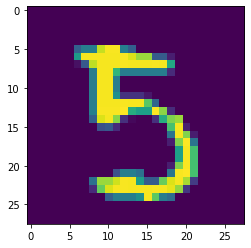

In [47]:
plt.imshow(my_number.reshape(28,28))

In [49]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_number.reshape(1,28,28,1)).argmax()

1/1 [==============================] - 0s 24ms/step


5

Looks like the CNN performed quite well!